In [1]:
import rasterio as rs
import rasterio.merge as rsmerge
from rasterio.plot import show
from rasterio.windows import Window

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

import os
from os.path import dirname, abspath, join

import geopandas

import numpy as np
import numpy


In [2]:
# GLOBAL PARAMS

current_url = os.getcwd()
home_url = dirname(abspath(current_url))
data_url = os.path.join(home_url, 'Data')
dtm_url = os.path.join(data_url, 'DTM')
dsm_url = os.path.join(data_url, 'DSM')
dtm_tiff_url = os.path.join(dtm_url, 'GeoTiff')
dsm_tiff_url = os.path.join(dsm_url, 'GeoTiff')
dtm_data_url = os.path.join(dtm_url, 'otherData')
dsm_data_url = os.path.join(dsm_url, 'otherData')


(9000, 17000)


<IPython.core.display.Javascript object>


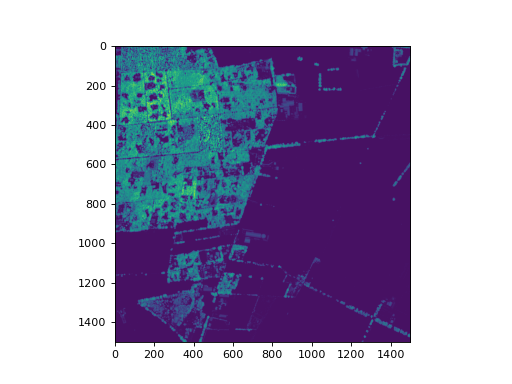

In [3]:
# working now with the first .tiff image.
file_name = 'DHMVIIDTMRAS1m_k01.tif'
file_url = os.path.join(dtm_tiff_url, file_name)

# open using rasterio which has the benefit of the .read() function giving a numpy array as a result.
img_dtm = rs.open(file_url)
full_img = img_dtm.read()

print(img_dtm.shape)
# change figure size and plot is.
plt.imshow(full_img[0])
plt.show()

In [8]:
"""
img_dtm.transform[2]

# crop the numpy array to avoid memoryErrors, which are very prone.
cropped_dtm = full_img[:, 7500:9000, 15500:17000]

# change figure size and plot is.
plt.figure(figsize=(22, 16))
plt.imshow(cropped_dtm[0, :, :])
plt.show()
"""

'\nimg_dtm.transform[2]\n\n# crop the numpy array to avoid memoryErrors, which are very prone.\ncropped_dtm = full_img[:, 7500:9000, 15500:17000]\n\n# change figure size and plot is.\nplt.figure(figsize=(22, 16))\nplt.imshow(cropped_dtm[0, :, :])\nplt.show()\n'

In [9]:
# working now with the first .tiff image.
file_name = 'DHMVIIDTMRAS1m_k01.tif'
file_url = os.path.join(dtm_tiff_url, file_name)

# open using rasterio which has the benefit of the .read() function giving a numpy array as a result.
img_dtm = rs.open(file_url)
full_img = img_dtm.read()

# crop the numpy array to avoid memoryErrors, which are very prone.
cropped_dtm = full_img[:, 7500:9000, 15500:17000]

# change figure size and plot is.
plt.imshow(cropped_dtm[0, :, :])
plt.show()

In [10]:
file_name = 'DHMVIIDSMRAS1m_k01.tif'
file_url = os.path.join(dsm_tiff_url, file_name)

img_dsm = rs.open(file_url)
full_img = img_dsm.read()
cropped_dsm = full_img[:, 7500:9000, 15500:17000]
plt.imshow(cropped_dsm[0, :, :])
plt.show()

In [11]:
# a first look at what it looks like to combine the first 2 maps. This operation gives the most 
# sensible looking result, allthough I don't know what it tells me.
new_dm = cropped_dsm / cropped_dtm

plt.imshow(new_dm[0, :, :])
plt.show()

<IPython.core.display.Javascript object>


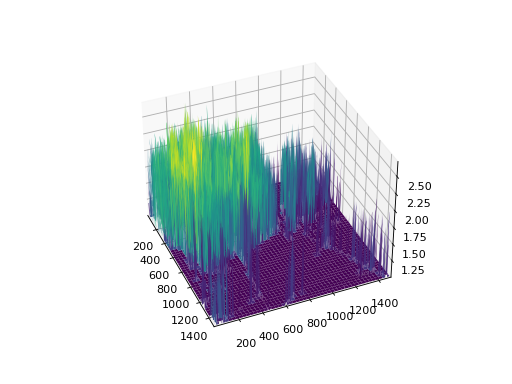

In [14]:
# how to handle 3d data from these tiff files. They are 1 dimensional numpy arrays.

# unpack the shape into x and y coordinates
n, m = new_dm[0].shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(n), np.arange(m))

# create new figure
fig = plt.figure()

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, new_dm[0], cmap='viridis')

# change background color.
ax.set_facecolor('white')
plt.show()

In [15]:
# we can use this to convert adress to coordinates used in the dataset.
# standard geopandas geocoding lib (photon) uses : <Geographic 2D CRS: EPSG:4326>
# the dataset uses : CRS.from_epsg(31370)

print(geopandas.tools.geocode('Sint-Marcusstraat 14, Borgerhout, Belgium').to_crs("EPSG:31370"))

# If you look at the dataset, the coordinates in the meta data look like this:

"""
| 1.00, 0.00, 145000.00|
| 0.00,-1.00, 247000.00|
| 0.00, 0.00, 1.00|
"""
# The last element of each line is actually x and y of the top-left point of the tiff file. 
# when you open the file the units on the x and y can be added to the above coordinates to get the 
# full and accurate coordinates.

# the size of the first raster is (9000,17000). If we add these to x and y, we should get the full
# coordinates of the map.
# top-left = (145000, 247000)
# bottom-left = (154000, 247000)
# top-right = (145000, 264000)
# bottom-right = (154000, 264000)

# looking up coordinates of Essen (which I know is in the scope of the map) on the internet, 
# they look like this:
coordinates = (156976.50, 239835.69)
map_coordinates = (145000.00, 247000.00)
tbf = abs(np.subtract(coordinates, map_coordinates))

file_name = 'DHMVIIDSMRAS1m_k01.tif'
file_url = os.path.join(dsm_tiff_url, file_name)

img_dsm = rs.open(file_url)
full_img = img_dsm.read()

crop_size = [tbf[0]-100, tbf[0]+100, tbf[1]-100, tbf[1]+100]
crop_size = [int(x) for x in crop_size]
print(crop_size)

cropped_tbf = full_img[:, crop_size[2]:crop_size[3], crop_size[0]:crop_size[1]]

# this can all be written in a function that gets the 3d image from a certain address!!

                        geometry  \
0  POINT (155092.610 211742.822)   

                                             address  
0  14, Sint-Marcusstraat, 2140, Sint-Marcusstraat...  
[11876, 12076, 7064, 7264]


<IPython.core.display.Javascript object>


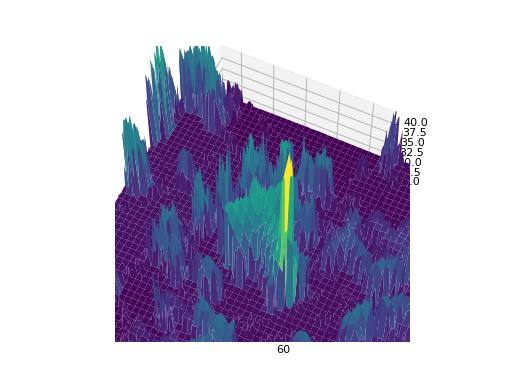

In [17]:
# how to handle 3d data from these tiff files. They are 1 dimensional numpy arrays.

# unpack the shape into x and y coordinates
n, m = cropped_tbf[0].shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(n), np.arange(m))

# create new figure of a certain size
fig = plt.figure()

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, cropped_tbf[0], cmap='viridis')

# change background color.
ax.set_facecolor('white')
plt.show()

In [22]:
file_name = 'DHMVII_vdc_k01.shp'
file_url = os.path.join(dtm_data_url, file_name)

tes = geopandas.read_file(file_url)
tes['OpnDatum1']


0    2013-02-20
1    2013-04-01
2    2013-02-20
Name: OpnDatum1, dtype: object